# Clustering Analysis

Data from:https://www.kaggle.com/datasets/dev0914sharma/customer-clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
data=pd.read_csv("segmentation data.csv")
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


# EDA

C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


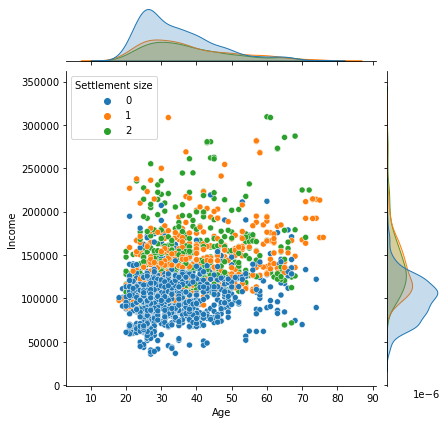

In [16]:
sns.jointplot(data.Age,data.Income,hue=data['Settlement size'],palette='tab10')

C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


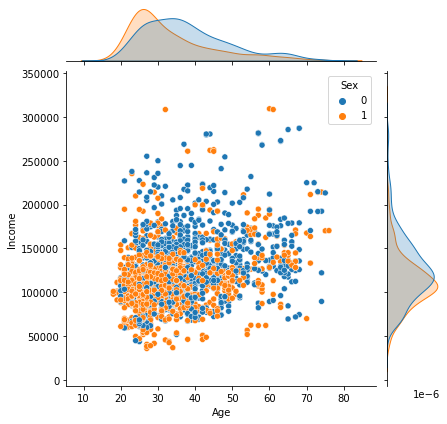

In [17]:
sns.jointplot(data.Age,data.Income,hue=data['Sex'],palette='tab10')

C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


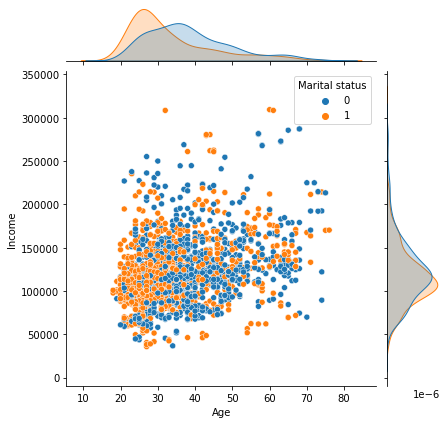

In [18]:
sns.jointplot(data.Age,data.Income,hue=data['Marital status'],palette='tab10')

(array([ 54., 314., 693., 533., 243.,  84.,  45.,  12.,  16.,   6.]),
 array([ 35832. ,  63185.2,  90538.4, 117891.6, 145244.8, 172598. ,
        199951.2, 227304.4, 254657.6, 282010.8, 309364. ]),
 <BarContainer object of 10 artists>)

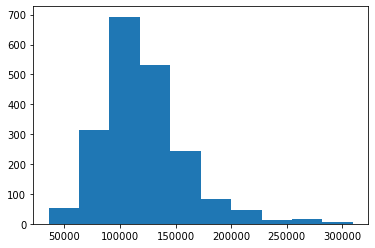

In [55]:
plt.hist(data['Income'])

(array([191., 548., 418., 311., 177., 145.,  85.,  68.,  41.,  16.]),
 array([18. , 23.8, 29.6, 35.4, 41.2, 47. , 52.8, 58.6, 64.4, 70.2, 76. ]),
 <BarContainer object of 10 artists>)

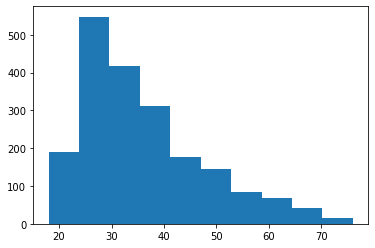

In [56]:
plt.hist(data['Age'])

Neither of the above are normally distributed. We should try to use log transform to make it normal (or sklearn's power transform).                           
                   
Both of them also need to be scaled since all the values are very large and most clustering algorithms are distance based.

(array([ 31., 243., 315., 363., 278., 286., 213., 114., 112.,  45.]),
 array([2.89037176, 3.03440792, 3.17844407, 3.32248023, 3.46651639,
        3.61055255, 3.75458871, 3.89862487, 4.04266102, 4.18669718,
        4.33073334]),
 <BarContainer object of 10 artists>)

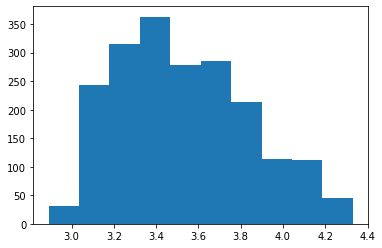

In [57]:
agelog=np.log(data['Age'])
plt.hist(agelog)

(array([  9.,  16.,  79., 182., 404., 681., 390., 162.,  53.,  24.]),
 array([10.48659663, 10.70216435, 10.91773207, 11.1332998 , 11.34886752,
        11.56443524, 11.78000296, 11.99557069, 12.21113841, 12.42670613,
        12.64227386]),
 <BarContainer object of 10 artists>)

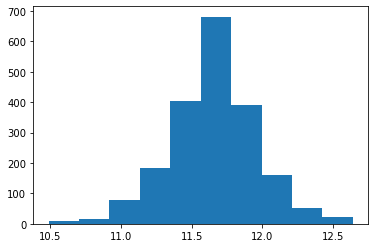

In [58]:
incomelog=np.log(data['Income'])
plt.hist(incomelog)

Both now appear to be more normally distributed. We could run a normality test to make sure

---------------

# Data transformations

In [80]:
df=data.drop('ID',axis=1)

In [81]:
# Remove the unkown education (Education = 0)
df['Education']=df['Education'].apply(lambda x: np.nan if x==0 else x)
df=df.dropna().reset_index(drop=True)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2.0,124670,1,2
1,1,1,22,1.0,150773,1,2
2,0,0,49,1.0,89210,0,0
3,0,0,45,1.0,171565,1,1
4,0,0,53,1.0,149031,1,1
...,...,...,...,...,...,...,...
1708,1,0,38,1.0,87670,0,0
1709,0,0,45,1.0,113414,1,0
1710,1,0,47,1.0,123525,0,0
1711,1,1,27,1.0,117744,1,0


In [111]:
data['Education']=data['Education'].apply(lambda x: np.nan if x==0 else x)
data=data.dropna().reset_index(drop=True)
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2.0,124670,1,2
1,100000002,1,1,22,1.0,150773,1,2
2,100000003,0,0,49,1.0,89210,0,0
3,100000004,0,0,45,1.0,171565,1,1
4,100000005,0,0,53,1.0,149031,1,1
...,...,...,...,...,...,...,...,...
1708,100001994,1,0,38,1.0,87670,0,0
1709,100001995,0,0,45,1.0,113414,1,0
1710,100001996,1,0,47,1.0,123525,0,0
1711,100001997,1,1,27,1.0,117744,1,0


In [82]:
# Apply log transforms to Income and Age columns:
df['Income']=np.log(df['Income'])
df['Age']=np.log(df['Age'])
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,4.204693,2.0,11.733426,1,2
1,1,1,3.091042,1.0,11.923531,1,2
2,0,0,3.891820,1.0,11.398748,0,0
3,0,0,3.806662,1.0,12.052717,1,1
4,0,0,3.970292,1.0,11.911910,1,1
...,...,...,...,...,...,...,...
1708,1,0,3.637586,1.0,11.381335,0,0
1709,0,0,3.806662,1.0,11.638800,1,0
1710,1,0,3.850148,1.0,11.724199,0,0
1711,1,1,3.295837,1.0,11.676268,1,0


In [83]:
# Scale all columns to 0-1
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df=scaler.fit_transform(df)
df

array([[0.        , 0.        , 0.91249369, ..., 0.57839313, 0.5       ,
        1.        ],
       [1.        , 1.        , 0.13931967, ..., 0.66658126, 0.5       ,
        1.        ],
       [0.        , 0.        , 0.69527579, ..., 0.42313932, 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.66634368, ..., 0.57411295, 0.        ,
        0.        ],
       [1.        , 1.        , 0.28150231, ..., 0.55187827, 0.5       ,
        0.        ],
       [1.        , 1.        , 0.19972907, ..., 0.4665817 , 0.        ,
        0.        ]])

In [87]:
train=pd.DataFrame(df,columns=data.columns[1:])
train

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.912494,0.5,0.578393,0.5,1.0
1,1.0,1.0,0.139320,0.0,0.666581,0.5,1.0
2,0.0,0.0,0.695276,0.0,0.423139,0.0,0.0
3,0.0,0.0,0.636153,0.0,0.726510,0.5,0.5
4,0.0,0.0,0.749756,0.0,0.661190,0.5,0.5
...,...,...,...,...,...,...,...
1708,1.0,0.0,0.518769,0.0,0.415061,0.0,0.0
1709,0.0,0.0,0.636153,0.0,0.534497,0.5,0.0
1710,1.0,0.0,0.666344,0.0,0.574113,0.0,0.0
1711,1.0,1.0,0.281502,0.0,0.551878,0.5,0.0


# KMeans Clustering

In [84]:
from sklearn.cluster import KMeans

In [88]:
model=KMeans(n_clusters=3)
model.fit(train)

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=3)

In [89]:
model.labels_

array([2, 1, 2, ..., 1, 1, 1])

C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


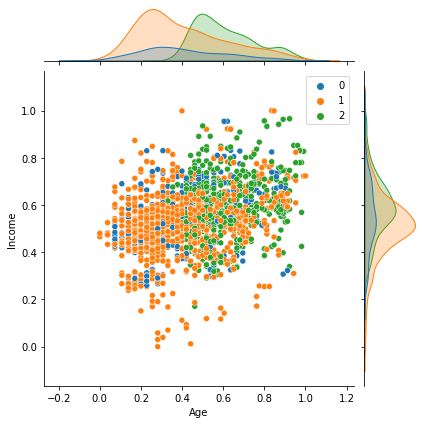

In [90]:
sns.jointplot(train.Age,train.Income,hue=model.labels_,palette='tab10')

In [91]:
inertiaList=[]
for k in range(2,20):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(train)
    inertiaList.append(kmeans.inertia_)

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

<ipython-input-92-c1a1589dd5c0>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(range(2,20),inertiaList,marker='*',markerSize=10)


Text(0, 0.5, 'Inertia')

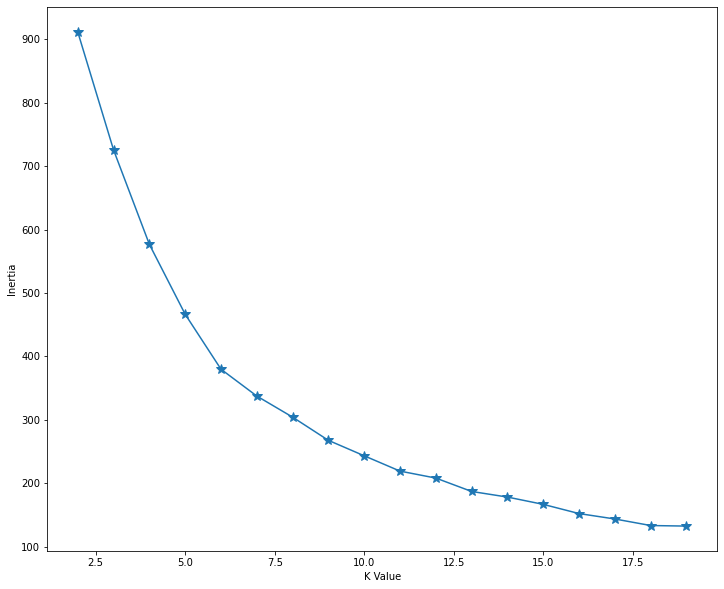

In [92]:
plt.figure(figsize=(12,10))
plt.plot(range(2,20),inertiaList,marker='*',markerSize=10)
plt.xlabel("K Value")
plt.ylabel("Inertia")

Graph elbows at around k=6

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


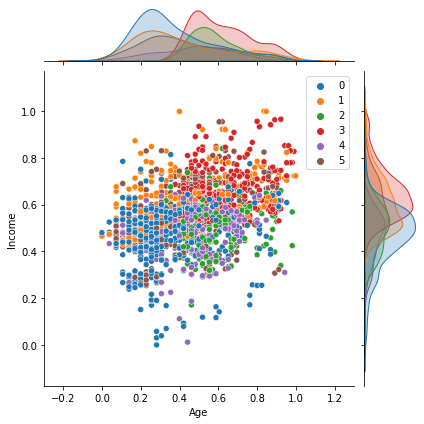

In [93]:
model=KMeans(n_clusters=6)
model.fit(df)
sns.jointplot(train.Age,train.Income,hue=model.labels_,palette='tab10')
plt.show()

Mostly income got split, while age didnt get affected

## Visualize better:

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pcatrain = pca.fit_transform(train)
pcadf = pd.DataFrame(data=pcatrain, columns=['f1', 'f2', 'f3'])
pcadf['Labels']=model.labels_

In [102]:
import plotly.express as px
fig = px.scatter_3d(pcadf, x='f1', y='f2', z='f3',
              color=pcadf['Labels'].astype(str))
fig.show()

The data seems to be separated very well! 

In [137]:
#Check metrics to quantify how well each cluster is separated
from sklearn.metrics import silhouette_score

In [138]:
silhouette_score(df,model.labels_)

0.4217678740090954

<u>Silhouette Score:</u>                
Close to +1: Good separation, samples are far away             
Close to 0: Poor separation, samples are close           
Close to -1: May be assigned to wrong clusters        

Separation is high, but not very large. As seen in the graph above, a lot of clusters are very similar (eg: green and dark blue, and red and orange), which may have reduced the Silhouette score.

# Explore what each cluster may be:

In [112]:
data['Class']=model.labels_
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Class
0,100000001,0,0,67,2.0,124670,1,2,3
1,100000002,1,1,22,1.0,150773,1,2,1
2,100000003,0,0,49,1.0,89210,0,0,2
3,100000004,0,0,45,1.0,171565,1,1,3
4,100000005,0,0,53,1.0,149031,1,1,3
...,...,...,...,...,...,...,...,...,...
1708,100001994,1,0,38,1.0,87670,0,0,4
1709,100001995,0,0,45,1.0,113414,1,0,2
1710,100001996,1,0,47,1.0,123525,0,0,4
1711,100001997,1,1,27,1.0,117744,1,0,0


### 1) Plotting the details of a cluster

In [113]:
def plotCluster(clusterNo):
    d=data[data['Class']==clusterNo].hist(figsize=(15,15))

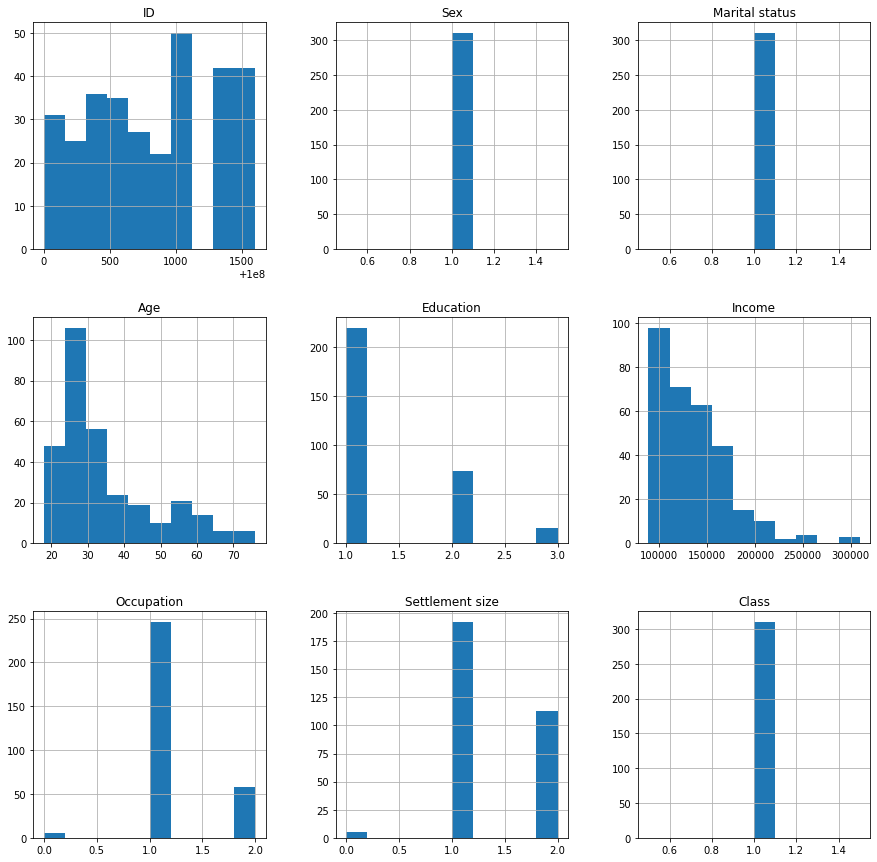

In [114]:
plotCluster(1)

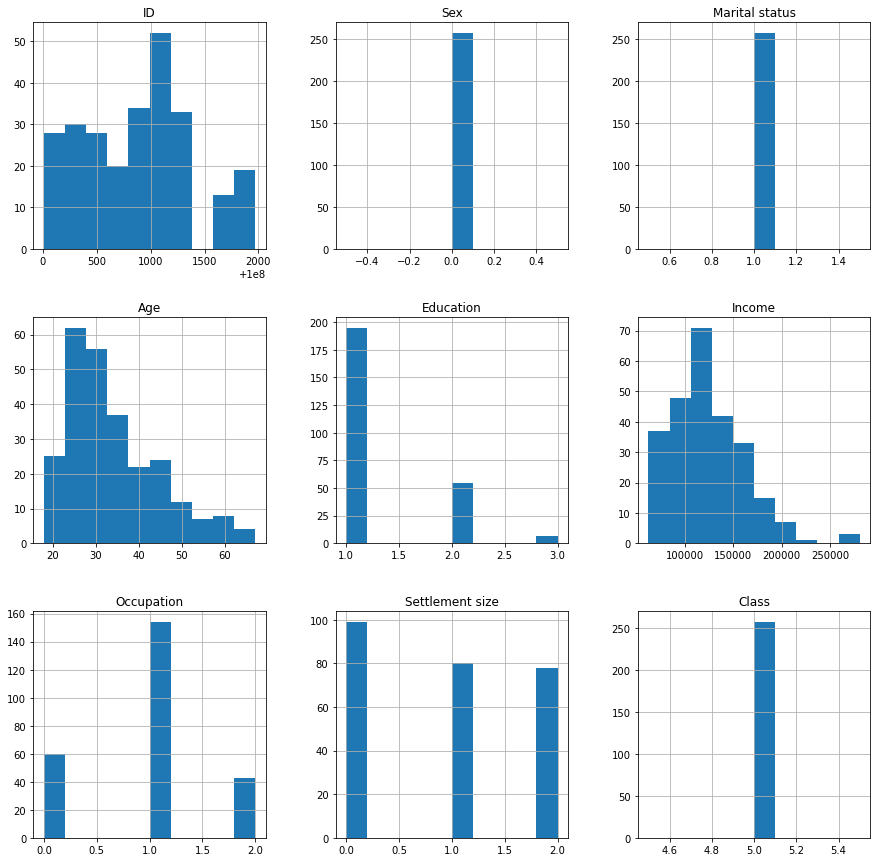

In [115]:
plotCluster(5)

Using the above, we can conclude what kind of customer falls in each cluster

### 2) Examine the cluster centers:

In [120]:
centers=pd.DataFrame(model.cluster_centers_, columns = data.columns[1:-1], index = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5'])
centers

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
C0,1.000000e+00,1.000000e+00,0.371443,0.102113,0.468109,0.215962,0.001174
C1,1.000000e+00,1.000000e+00,0.410948,0.170968,0.605776,0.583871,0.674194
C2,-1.110223e-16,3.330669e-16,0.588753,0.053398,0.496763,0.172330,0.046117
C3,-8.881784e-16,2.220446e-16,0.619743,0.080163,0.647190,0.658967,0.755435
C4,1.000000e+00,2.220446e-16,0.473586,0.068493,0.469372,0.195205,0.044521
C5,-4.440892e-16,1.000000e+00,0.409658,0.134241,0.550641,0.466926,0.459144


We can get a rough idea of the categorical columns, but its hard to tell with the scaled columns, hence this is difficult to interpret

### 3) Using a Decision Tree Classifier

In [130]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
import sklearn
from sklearn.metrics import classification_report

In [122]:
tree=DecisionTreeClassifier()
tree.fit(data.drop(['ID','Class'],axis=1),data['Class'])

DecisionTreeClassifier()

In [124]:
print(classification_report(data['Class'],tree.predict(data.drop(['ID','Class'],axis=1))))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       426
           1       1.00      1.00      1.00       310
           2       1.00      1.00      1.00       206
           3       1.00      1.00      1.00       368
           4       1.00      1.00      1.00       146
           5       1.00      1.00      1.00       257

    accuracy                           1.00      1713
   macro avg       1.00      1.00      1.00      1713
weighted avg       1.00      1.00      1.00      1713



The model fitted perfectly, hence the clusters predicted will be 100% accurate

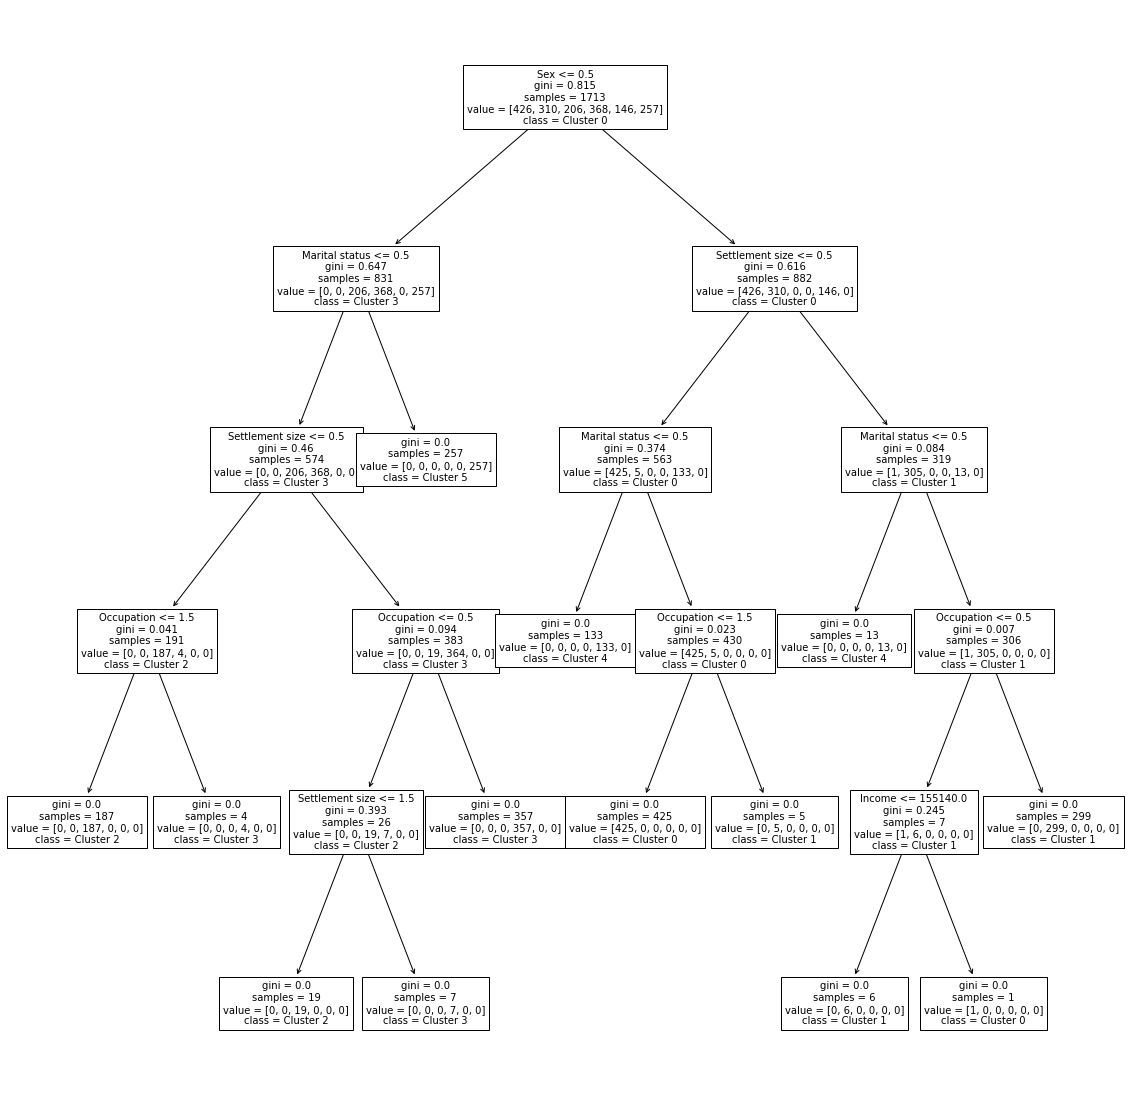

In [135]:
plt.figure(figsize=(20,20))
plot_tree(tree,feature_names=data.columns[1:-1],  
        class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
         fontsize=10)
plt.show()

Tracing along the tree can tell us characteristics about each cluster